# Descenso de gradiente por lotes (BGD)

El descenso de gradiente es un algoritmo de optimización que minimiza la función de coste al ir ajustando los parámetros del modelo de forma iterativa.

El proceso se basa en ir tomando la derivada parcial de la función de coste. Si representamos la función de coste respecto al valor de un parámetro, forma una función convexa, tal y como se muestra a continuación:


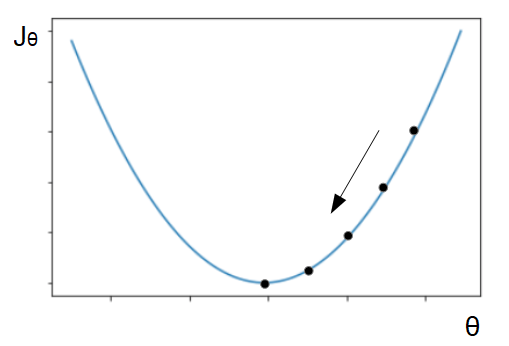

Al variar el parámetro Theta de derecha a izquierda, la función de coste J(Theta) va decreciendo hasta llegar a un mínimo, punto en el que se deja de iterar. Este proceso se logra utilizando la siguiente regla de actualización:

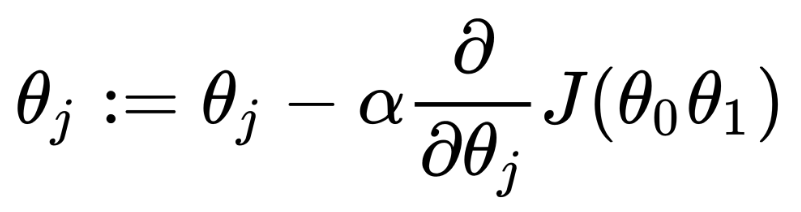

En la fórmula anterior, *alpha* es el **learning rate**, que es un hiperparámetro y, por tanto, se puede modificar "manualmente". 

El término de la derivada parcial es la pendiente de la función de coste y debe calcularse tanto para theta 0 como para theta 1. Cuando la derivada, y por lo tanto la pendiente, es positiva, se le resta un valor positivo al valor anterior de theta, moviéndose de derecha a izquierda en el diagrama anterior. Alternativamente, si la pendiente es negativa, theta aumenta, moviéndose de derecha a izquierda. Además, en el mínimo la pendiente es cero, por lo que el descenso se detendrá. Esto es exactamente lo que queremos, ya que no importa dónde comencemos el descenso del gradiente, se garantiza que la regla de actualización moverá theta hacia el mínimo.

Al sustituir la función de coste en la ecuación anterior y tomar la derivada de ambos valores de theta, se obtienen las siguientes reglas de actualización:

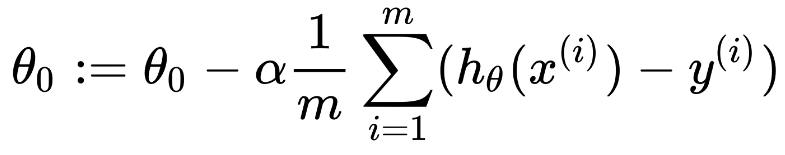

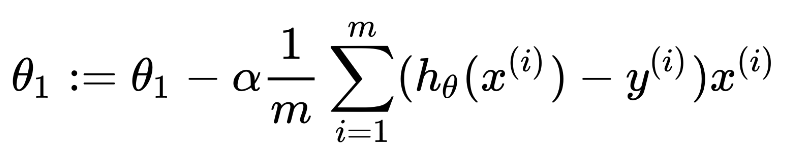

En las iteraciones y las actualizaciones posteriores, theta convergerá en valores que minimicen las funciones de coste, lo que dará como resultado la mejor línea recta para los datos de entrenamiento. Hay dos cosas que deben tenerse en cuenta:

- En primer lugar, los valores de inicialización de theta, es decir, dónde comenzamos el descenso del gradiente. En la mayoría de los casos, la inicialización aleatoria funciona mejor. 
- Por otro lado, debemos establecer la tasa de aprendizaje, alfa, que debe ser un número entre cero y uno. 
    - Si la tasa de aprendizaje se establece demasiado alta, es probable que supere los mínimos. 
    - Si se establece demasiado baja, tardará demasiado en converger. 
    
Para establecer un valor apropiado de alpha, puede ser necesaria cierta experimentación con el modelo particular que se esté utilizando. En deep learning, a menudo se utiliza una tasa de aprendizaje adaptativo para obtener mejores resultados. En este caso, la tasa de aprendizaje se va modificando, generalmente disminuyendo, en cada iteración del descenso de gradiente.

El tipo de descenso de gradiente que hemos discutido hasta ahora se llama descenso de gradiente por lotes (BGD), el cual utiliza todo el conjunto de entrenamiento en cada actualización. Por tanto, a medida que aumenta el tamaño del conjunto de entrenamiento, el descenso del gradiente por lotes se vuelve cada vez más lento. Además, el descenso de gradientes por lotes escala mucho mejor cuando hay una gran cantidad de características, por lo que se usa con mayor frecuencia cuando hay un conjunto de entrenamiento pequeño pero con una gran cantidad de características.

# Descenso de gradiente estocástico (SGD)

Una alternativa al descenso de gradiente por lotes es el descenso de gradiente estocástico (SGD). En lugar de calcular el gradiente usando todo el conjunto de entrenamiento, SGD calcula el gradiente usando una sola muestra elegida al azar en cada iteración. 

La ventaja de SGD es que todo el conjunto de entrenamiento no tiene que guardarse en la memoria, ya que en cada iteración solo es necesaria una instancia. 

Debido a que el descenso de gradiente estocástico elige muestras al azar, su comportamiento es un poco menos regular que BGD:

- Con el descenso de gradiente por lotes, cada iteración mueve suavemente el error (J(theta)) hacia los mínimos. 
- Con SGD, cada iteración no necesariamente mueve el coste más cerca de los mínimos. Tiende a saltar un poco, moviéndose hacia los mínimos solo en promedio en varias iteraciones. 

La naturaleza aleatoria de SGD se puede utilizar con ventaja cuando hay más de un mínimo, ya que puede saltarse los mínimos locales y encontrar los mínimos globales. Por ejemplo, consideremos la siguiente función de coste:

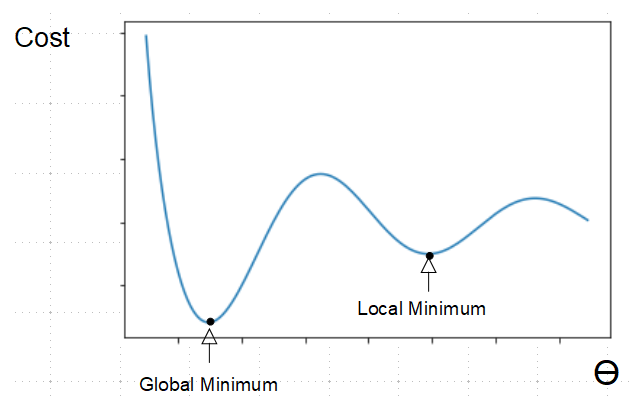

Si el descenso del gradiente por lotes comenzase a la derecha del mínimo local, le sería muy difícil encontrar el mínimo global. 

Para el caso de la regresión lineal, la función de coste  siempre es una función convexa con un único mínimo, por lo que no tiene este problema. Sin embargo, este no es siempre el caso. Por ejemplo, las redes neuronales presentan funciones de coste que pueden tener varios mínimos locales.

# Características múltiples

En un ejemplo realista, tendríamos más de una característica y cada característica tendría asociado un valor de parámetro que requiere un ajuste. En este caso, escribimos la función de hipótesis de la siguiente manera:

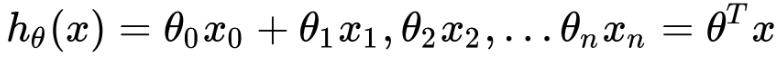

Aquí, tenemos que:
- x0 se denomina sesgo y se establece en uno
- x1 a xn son los valores de las características
- n es el número total de características

Es posible escribir una versión vectorizada de la función de hipótesis, donde theta es el vector de parámetros y x es el vector de características.

La función de coste sigue siendo básicamente la misma que en el caso de una sola característica, pero ahora se suma el error. Sin embargo, es necesario ajustar las reglas de descenso de gradientes y ser claros sobre la notación requerida. En las reglas de actualización para el descenso de gradientes para una sola característica, usamos la notación para los valores de los parámetros theta_0 y theta_1. Para la versión de características múltiples, simplemente envolvemos los valores de estos parámetros y sus características asociadas en vectores. El vector de parámetros se anota como theta_j, donde el subíndice j se refiere a la característica y es un número entero entre 1 y n, con n igual al número de características.

Aunque debe haber una regla de actualización independiente para cada parámetro, podemos generalizar estas reglas de la siguiente manera:

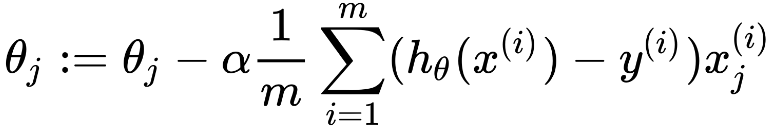

Si hay una regla de actualización para cada parámetro, la regla para el parámetro de la característica j=1 sería, por ejemplo, la siguiente:

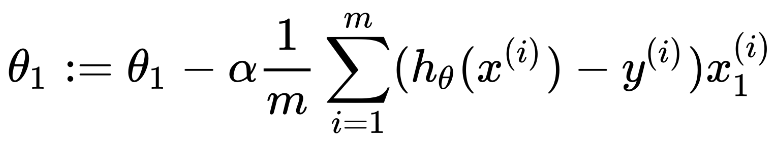

Las variables x_i e y_i se refieren, como en el ejemplo de característica única, al valor predicho y al valor real de la i-ésima muestra de entrenamiento, respectivamente. Sin embargo, en el caso de características múltiples, en lugar de ser valores únicos, ahora son vectores. 

El valor xj_i se refiere a la característica j de la muestra de entrenamiento i, y m es el número total de muestras en el conjunto de entrenamiento.